# Reinforcement Learning (Q-Learning)

Remark: The original file has been simplified and reformatted to Jupyter Notebook for teaching in 2102541 IoT Fundamentals. (C. Aswakul 2 Apr 2019).
Remark2: Debugged movement orientation and plot for IoTcloudServe@TEIN Collaboration Workshop 2 in NUOL, Laos (C. Aswakul 12 Dec 2019)

In [3]:
# REF: github.com/ShangtongZhang/reinforcement-learning-an-introduction
#      /blob/master/chapter06/cliff_walking.py
       
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define size of area to walk along the cliff

In [5]:
# area height
WORLD_HEIGHT = 5

# area width
WORLD_WIDTH = 15

# starting coordinate
START = [0, 0]

# goal coordinate
GOAL = [0, WORLD_WIDTH-1]

# Define Q-learning parameters

In [6]:
# probability for exploration
EPSILON = 0.1

# step size
ALPHA = 0.5

# gamma for Q-Learning and Expected Sarsa
GAMMA = 1

# number of episodes to learn = number of times to reach the goal
EPISODES = 100

# number of episodes per each figure plotting of state evolution
EPISODES_PER_EACH_PLOT = 20

# Define action space and necessary functions

In [7]:
# all possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        next_state = [max(i - 1, 0), j]
    elif action == ACTION_LEFT:
        next_state = [i, max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        next_state = [i, min(j + 1, WORLD_WIDTH - 1)]
    elif action == ACTION_DOWN:
        next_state = [min(i + 1, WORLD_HEIGHT - 1), j]
    else:
        assert False

    reward = -1
    if (action == ACTION_UP and i == 1 and 1 <= j <= WORLD_WIDTH-2) or (
        action == ACTION_RIGHT and state == START):
        reward = -100
        next_state = START

    return next_state, reward

# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

# execute a learning episode with Q-Learning
def q_learning(q_value, step_size=ALPHA):
    state = START
    state_hist = [state]
    action_hist = [100]
    rewards = 0.0
    num_actions = 0
    while state != GOAL:
        num_actions += 1 #cak#
        action = choose_action(state, q_value)
        next_state, reward = step(state, action)
        rewards += reward
        # Q-Learning update
        q_value[state[0], state[1], action] += step_size * (
                reward + GAMMA * np.max(q_value[next_state[0], next_state[1], :]) -
                q_value[state[0], state[1], action])
        state = next_state
        state_hist.append(state)
        action_hist.append(action)

    return rewards, num_actions, state_hist, action_hist

# Start Q-learning
$Q(S_t, A_t) \leftarrow (1-\alpha)Q(S_t, A_t) + \alpha \left( R_{t+1} + \gamma \max_a Q(S_{t+1}, a)\right)$

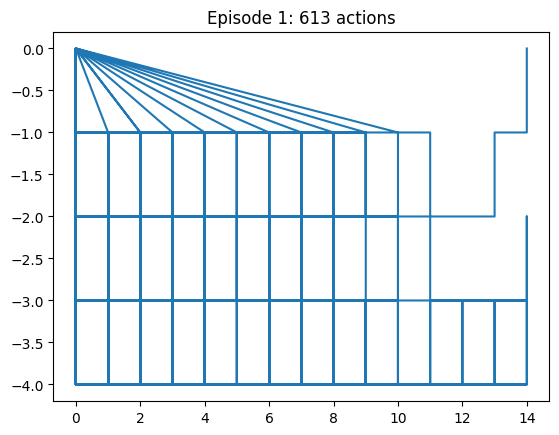

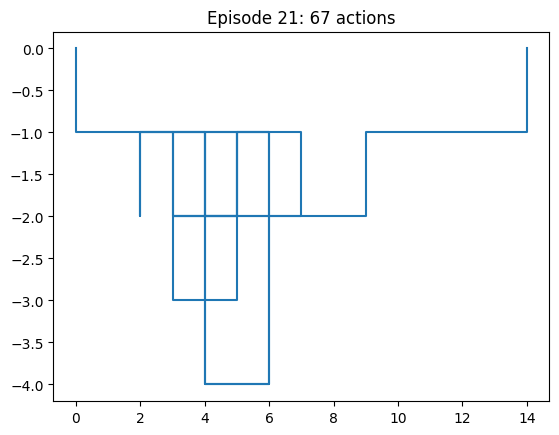

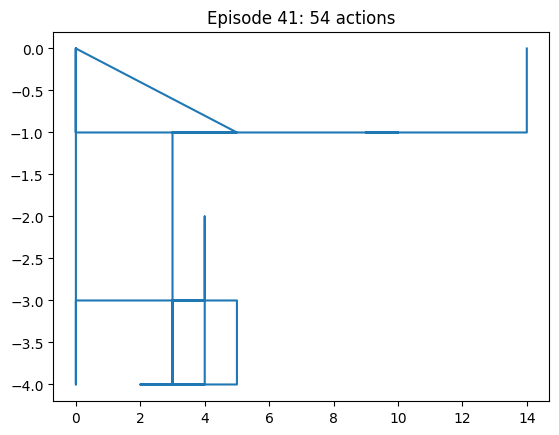

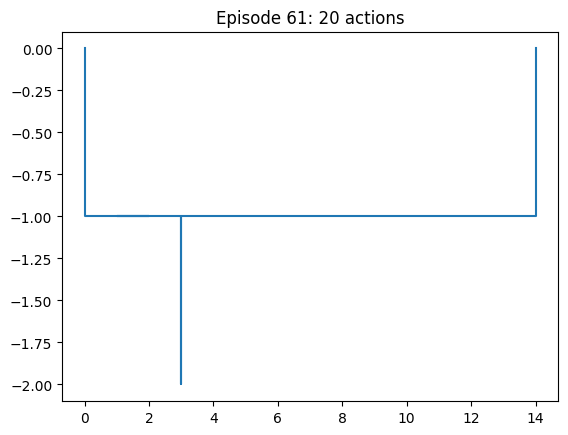

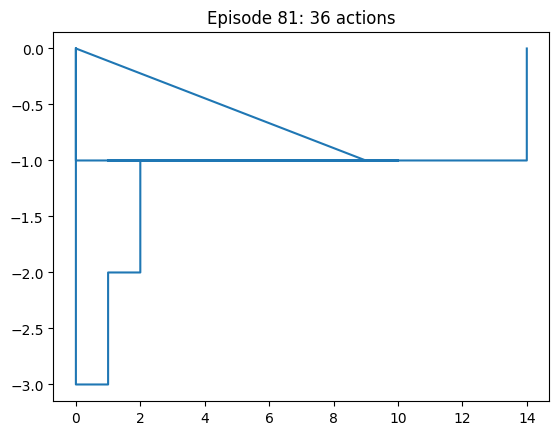

In [8]:
rewards_q_learning = np.zeros(EPISODES)
actions_to_goal = np.zeros(EPISODES)
q_q_learning = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

for i in range(0, EPISODES):
    
    rewards, num_actions, state_hist, action_hist = q_learning(q_q_learning)
    rewards_q_learning[i] = rewards
    actions_to_goal[i] = num_actions
    
    if i%EPISODES_PER_EACH_PLOT == 0:
        x = np.array(state_hist)[:,1]
        y = np.array(state_hist)[:,0]
        plt.figure()
        plt.plot(x,-y)
        plt.title('Episode ' + str(i+1) + ': ' + str(num_actions)+' actions');

# Plot number of actions required to reach the goal

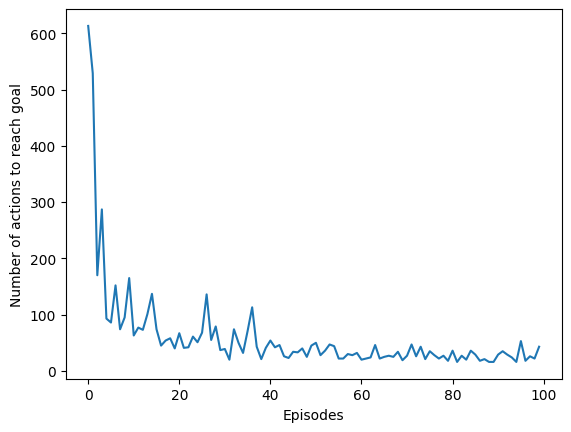

In [9]:
plt.plot(actions_to_goal, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Number of actions to reach goal')
plt.show()

# Plot reward curve

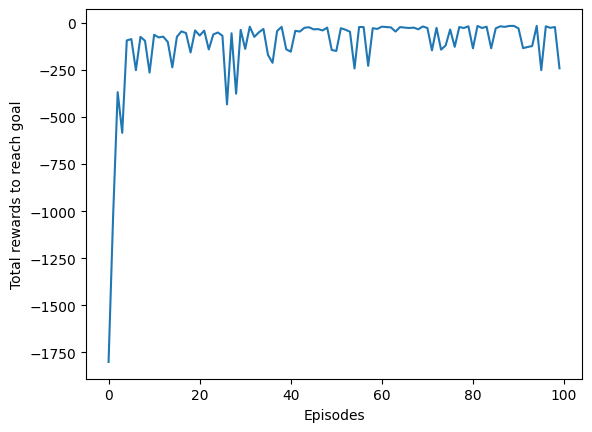

In [10]:
plt.plot(rewards_q_learning)
plt.xlabel('Episodes')
plt.ylabel('Total rewards to reach goal')
# plt.ylim([-1000, 0])
plt.show()

# Display optimal policy

In [11]:
def print_optimal_policy(q_value):
    optimal_policy = []
    for i in range(0, WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_value[i, j, :])
            if bestAction == ACTION_UP:
                optimal_policy[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimal_policy[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimal_policy[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimal_policy[-1].append('R')
    for row in optimal_policy:
        print(row)

print('Q-Learning Optimal Policy:')
print_optimal_policy(q_q_learning)

Q-Learning Optimal Policy:
['D', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'U']
['R', 'R', 'R', 'U', 'R', 'U', 'R', 'L', 'R', 'R', 'U', 'R', 'U', 'R', 'U']
['D', 'R', 'U', 'U', 'R', 'R', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'U']
['L', 'D', 'L', 'R', 'R', 'L', 'D', 'D', 'R', 'D', 'R', 'R', 'R', 'U', 'U']
